In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
# Constant Variables
# Directories
DATA_DIRECTORY = 'data/'
GRAPHS_DIRECTORY = 'graphs/'

# Filenames
CLEANED_DATA_FILENAME = 'cleaned_data.json'
BUS_LATE_LOCATIONS_FILENAME = 'bus_late_locations.png'
BUS_LATE_RELATIONSHIP_FILENAME = 'bus_late_relationship.png'

# Load the Data

In [3]:
# Read cleaned_real_time_data.json
df = pd.read_json(DATA_DIRECTORY + CLEANED_DATA_FILENAME)

# Convert the time strings to datetime.time objects
df['RecordedTime'] = pd.to_datetime(df['RecordedTime'], format='%H:%M:%S').dt.time

# Convert the date strings to datetime.date objects
df['RecordedDate'] = pd.to_datetime(df['RecordedDate'], unit='ms')

# Get the recorded hour
df['RecordedHour'] = df['RecordedTime'].apply(lambda x: x.hour)

# Set the RouteNo as string type
df['RouteNo'] = df['RouteNo'].astype(str)

In [4]:
df

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
0,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07,True,7
1,144,NORTH,49.240633,-122.968050,07:13:13,2024-04-07,True,7
2,144,NORTH,49.258883,-122.964050,07:21:03,2024-04-07,True,7
3,144,NORTH,49.258900,-122.964050,07:22:03,2024-04-07,True,7
4,144,SOUTH,49.243283,-122.973483,07:39:40,2024-04-07,True,7
...,...,...,...,...,...,...,...,...
8713,R5,WEST,49.278533,-122.912733,22:55:24,2024-04-10,False,22
8714,R5,WEST,49.281400,-123.099283,22:55:13,2024-04-10,False,22
8715,R5,WEST,49.281200,-123.025350,22:57:30,2024-04-10,True,22
8716,R5,WEST,49.281183,-123.025333,22:58:29,2024-04-10,True,22


# Analyze the Data

In [5]:
df[df['RouteNo'] == '144']

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
0,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07,True,7
1,144,NORTH,49.240633,-122.968050,07:13:13,2024-04-07,True,7
2,144,NORTH,49.258883,-122.964050,07:21:03,2024-04-07,True,7
3,144,NORTH,49.258900,-122.964050,07:22:03,2024-04-07,True,7
4,144,SOUTH,49.243283,-122.973483,07:39:40,2024-04-07,True,7
...,...,...,...,...,...,...,...,...
2258,144,NORTH,49.234183,-122.956700,22:48:39,2024-04-10,True,22
2259,144,NORTH,49.236167,-122.955100,22:49:38,2024-04-10,True,22
2260,144,NORTH,49.248650,-122.974633,22:55:46,2024-04-10,True,22
2261,144,SOUTH,49.235233,-122.955083,22:58:35,2024-04-10,True,22


In [6]:
df[df['RouteNo'] == '145']

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
2263,145,SOUTH,49.278533,-122.912917,07:55:51,2024-04-07,True,7
2264,145,SOUTH,49.278533,-122.912933,08:03:39,2024-04-07,False,8
2265,145,SOUTH,49.278533,-122.912933,08:04:39,2024-04-07,False,8
2266,145,SOUTH,49.278533,-122.912933,08:06:40,2024-04-07,False,8
2267,145,SOUTH,49.252583,-122.913233,08:07:48,2024-04-07,True,8
...,...,...,...,...,...,...,...,...
4556,145,SOUTH,49.253217,-122.917583,22:55:22,2024-04-10,True,22
4557,145,SOUTH,49.253217,-122.917583,22:56:23,2024-04-10,True,22
4558,145,SOUTH,49.253217,-122.917583,22:57:22,2024-04-10,True,22
4559,145,SOUTH,49.253217,-122.917583,22:58:23,2024-04-10,False,22


In [7]:
df[df['RouteNo'] == 'R5']

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
4561,R5,EAST,49.281067,-123.024967,07:02:28,2024-04-07,True,7
4562,R5,EAST,49.281067,-123.024967,07:03:27,2024-04-07,True,7
4563,R5,WEST,49.272533,-123.023367,07:04:06,2024-04-07,True,7
4564,R5,WEST,49.278533,-122.912767,07:04:03,2024-04-07,False,7
4565,R5,WEST,49.280467,-122.954000,07:05:04,2024-04-07,True,7
...,...,...,...,...,...,...,...,...
8713,R5,WEST,49.278533,-122.912733,22:55:24,2024-04-10,False,22
8714,R5,WEST,49.281400,-123.099283,22:55:13,2024-04-10,False,22
8715,R5,WEST,49.281200,-123.025350,22:57:30,2024-04-10,True,22
8716,R5,WEST,49.281183,-123.025333,22:58:29,2024-04-10,True,22


In [8]:
df[df['OnTime'] == True]

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
0,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07,True,7
1,144,NORTH,49.240633,-122.968050,07:13:13,2024-04-07,True,7
2,144,NORTH,49.258883,-122.964050,07:21:03,2024-04-07,True,7
3,144,NORTH,49.258900,-122.964050,07:22:03,2024-04-07,True,7
4,144,SOUTH,49.243283,-122.973483,07:39:40,2024-04-07,True,7
...,...,...,...,...,...,...,...,...
8711,R5,WEST,49.278533,-122.912733,22:54:04,2024-04-10,True,22
8712,R5,WEST,49.281100,-123.003967,22:54:33,2024-04-10,True,22
8715,R5,WEST,49.281200,-123.025350,22:57:30,2024-04-10,True,22
8716,R5,WEST,49.281183,-123.025333,22:58:29,2024-04-10,True,22


In [9]:
df[df['OnTime'] == False]

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
5,144,SOUTH,49.225250,-122.995650,07:51:46,2024-04-07,False,7
8,144,SOUTH,49.243283,-122.973417,08:34:47,2024-04-07,False,8
28,144,SOUTH,49.278117,-122.911700,09:48:44,2024-04-07,False,9
30,144,SOUTH,49.278133,-122.911700,09:50:42,2024-04-07,False,9
33,144,NORTH,49.225083,-123.002117,09:59:51,2024-04-07,False,9
...,...,...,...,...,...,...,...,...
8703,R5,WEST,49.281400,-123.099283,22:40:30,2024-04-10,False,22
8704,R5,WEST,49.278533,-122.912733,22:40:03,2024-04-10,False,22
8705,R5,WEST,49.278533,-122.912733,22:41:01,2024-04-10,False,22
8713,R5,WEST,49.278533,-122.912733,22:55:24,2024-04-10,False,22


In [10]:
df[(df['OnTime'] == True) & (df['RouteNo'] == '144')]

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
0,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07,True,7
1,144,NORTH,49.240633,-122.968050,07:13:13,2024-04-07,True,7
2,144,NORTH,49.258883,-122.964050,07:21:03,2024-04-07,True,7
3,144,NORTH,49.258900,-122.964050,07:22:03,2024-04-07,True,7
4,144,SOUTH,49.243283,-122.973483,07:39:40,2024-04-07,True,7
...,...,...,...,...,...,...,...,...
2258,144,NORTH,49.234183,-122.956700,22:48:39,2024-04-10,True,22
2259,144,NORTH,49.236167,-122.955100,22:49:38,2024-04-10,True,22
2260,144,NORTH,49.248650,-122.974633,22:55:46,2024-04-10,True,22
2261,144,SOUTH,49.235233,-122.955083,22:58:35,2024-04-10,True,22


In [11]:
df[(df['OnTime'] == True) & (df['RouteNo'] == '145')]

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
2263,145,SOUTH,49.278533,-122.912917,07:55:51,2024-04-07,True,7
2267,145,SOUTH,49.252583,-122.913233,08:07:48,2024-04-07,True,8
2269,145,SOUTH,49.253233,-122.917533,08:08:54,2024-04-07,True,8
2270,145,SOUTH,49.253233,-122.917533,08:09:54,2024-04-07,True,8
2271,145,SOUTH,49.253233,-122.917533,08:10:55,2024-04-07,True,8
...,...,...,...,...,...,...,...,...
4554,145,SOUTH,49.253217,-122.917583,22:52:47,2024-04-10,True,22
4555,145,SOUTH,49.253217,-122.917583,22:54:23,2024-04-10,True,22
4556,145,SOUTH,49.253217,-122.917583,22:55:22,2024-04-10,True,22
4557,145,SOUTH,49.253217,-122.917583,22:56:23,2024-04-10,True,22


In [12]:
df[(df['OnTime'] == True) & (df['RouteNo'] == 'R5')]

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
4561,R5,EAST,49.281067,-123.024967,07:02:28,2024-04-07,True,7
4562,R5,EAST,49.281067,-123.024967,07:03:27,2024-04-07,True,7
4563,R5,WEST,49.272533,-123.023367,07:04:06,2024-04-07,True,7
4565,R5,WEST,49.280467,-122.954000,07:05:04,2024-04-07,True,7
4566,R5,WEST,49.272533,-123.023367,07:04:56,2024-04-07,True,7
...,...,...,...,...,...,...,...,...
8711,R5,WEST,49.278533,-122.912733,22:54:04,2024-04-10,True,22
8712,R5,WEST,49.281100,-123.003967,22:54:33,2024-04-10,True,22
8715,R5,WEST,49.281200,-123.025350,22:57:30,2024-04-10,True,22
8716,R5,WEST,49.281183,-123.025333,22:58:29,2024-04-10,True,22


In [13]:
df[(df['OnTime'] == False) & (df['RouteNo'] == '144')]

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
5,144,SOUTH,49.225250,-122.995650,07:51:46,2024-04-07,False,7
8,144,SOUTH,49.243283,-122.973417,08:34:47,2024-04-07,False,8
28,144,SOUTH,49.278117,-122.911700,09:48:44,2024-04-07,False,9
30,144,SOUTH,49.278133,-122.911700,09:50:42,2024-04-07,False,9
33,144,NORTH,49.225083,-123.002117,09:59:51,2024-04-07,False,9
...,...,...,...,...,...,...,...,...
2229,144,NORTH,49.229800,-122.988050,21:12:39,2024-04-10,False,21
2230,144,SOUTH,49.227517,-122.994383,21:14:29,2024-04-10,False,21
2231,144,NORTH,49.232833,-122.959133,21:18:19,2024-04-10,False,21
2232,144,NORTH,49.243283,-122.973417,21:25:39,2024-04-10,False,21


In [14]:
df[(df['OnTime'] == False) & (df['RouteNo'] == '145')]

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
2264,145,SOUTH,49.278533,-122.912933,08:03:39,2024-04-07,False,8
2265,145,SOUTH,49.278533,-122.912933,08:04:39,2024-04-07,False,8
2266,145,SOUTH,49.278533,-122.912933,08:06:40,2024-04-07,False,8
2268,145,SOUTH,49.278533,-122.912933,08:07:39,2024-04-07,False,8
2280,145,SOUTH,49.253233,-122.917550,08:47:58,2024-04-07,False,8
...,...,...,...,...,...,...,...,...
4550,145,SOUTH,49.253200,-122.917533,22:44:08,2024-04-10,False,22
4551,145,SOUTH,49.253200,-122.917533,22:45:17,2024-04-10,False,22
4552,145,SOUTH,49.253200,-122.917683,22:46:05,2024-04-10,False,22
4559,145,SOUTH,49.253217,-122.917583,22:58:23,2024-04-10,False,22


In [15]:
df[(df['OnTime'] == False) & (df['RouteNo'] == 'R5')]

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
4564,R5,WEST,49.278533,-122.912767,07:04:03,2024-04-07,False,7
4567,R5,WEST,49.278517,-122.912767,07:05:03,2024-04-07,False,7
4568,R5,WEST,49.278517,-122.912767,07:06:03,2024-04-07,False,7
4570,R5,WEST,49.278517,-122.912750,07:07:25,2024-04-07,False,7
4577,R5,WEST,49.278517,-122.912767,07:14:38,2024-04-07,False,7
...,...,...,...,...,...,...,...,...
8703,R5,WEST,49.281400,-123.099283,22:40:30,2024-04-10,False,22
8704,R5,WEST,49.278533,-122.912733,22:40:03,2024-04-10,False,22
8705,R5,WEST,49.278533,-122.912733,22:41:01,2024-04-10,False,22
8713,R5,WEST,49.278533,-122.912733,22:55:24,2024-04-10,False,22


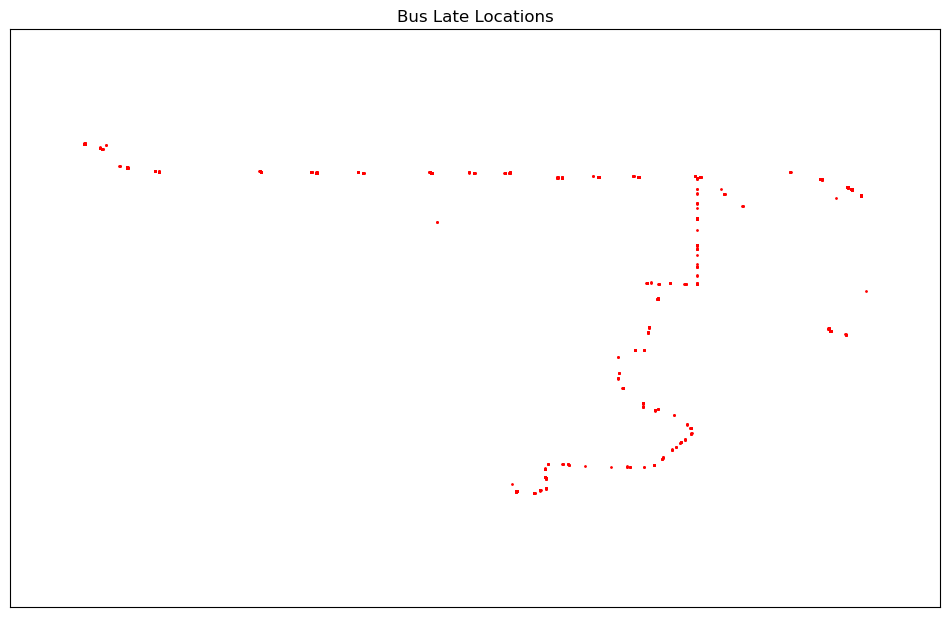

In [16]:
# Create a map that shows the real time data which is late
df_late = df[(df['OnTime'] == False)]
lats = df_late['Latitude']
lons = df_late['Longitude']

# Create a map
plt.figure(figsize=(12,8))
m = Basemap(projection='merc', 
            llcrnrlat=min(lats)-0.02, urcrnrlat=max(lats)+0.02,
            llcrnrlon=min(lons)-0.02, urcrnrlon=max(lons)+0.02, 
            resolution='i')

# Convert the Latitudes and Longitudes to the map positions
x, y = m(lons, lats)

# Plot the graph
m.scatter(x, y, marker='o', color='r', zorder=5, s=1)
plt.title('Bus Late Locations')
plt.savefig(GRAPHS_DIRECTORY + BUS_LATE_LOCATIONS_FILENAME)

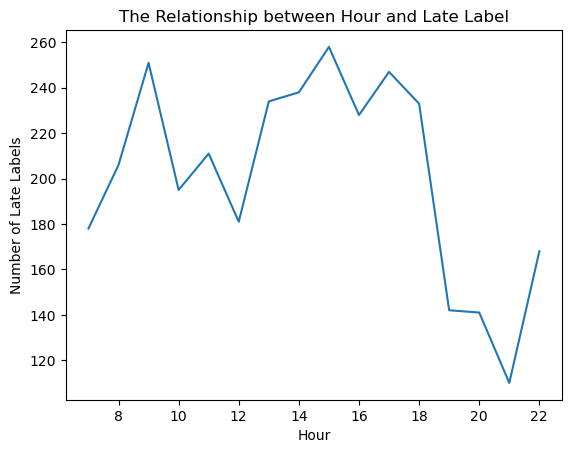

In [17]:
ax = df_late.groupby('RecordedHour').size().plot(title='The Relationship between Hour and Late Label', ylabel='Number of Late Labels', xlabel='Hour')
ax.get_figure().savefig(GRAPHS_DIRECTORY + BUS_LATE_RELATIONSHIP_FILENAME)